In [1]:
import cv2

In [2]:
from skimage import io
from google.colab.patches import cv2_imshow # for image display

In [3]:
pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.7.0.72
Uninstalling opencv-python-headless-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavformat-e0b1067c.so.59.27.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavutil-82c407cb.so.57.28.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libcrypto-47343492.so.1.1
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libpng16-57e5e0a0.so.16.37.0
    /usr/local/lib/p

In [4]:
pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.5.2.52 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.5.2.52


In [5]:
urls = ["https://images.unsplash.com/photo-1651764126724-5af9b63ec825?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1596&q=80",
       "https://images.unsplash.com/photo-1651693029270-bf3c29ad0b20?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80",
      "https://images.unsplash.com/photo-1651666445280-426bae060557?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=987&q=80",
      "https://i.guim.co.uk/img/media/c4c3ed5b82928811b804cc817f77da2e15ea228b/0_372_2400_1440/master/2400.jpg?width=465&quality=45&auto=format&fit=max&dpr=2&s=ced60313f74bd842900905f05a2b4f5e"]  

for url in urls:
  image1 = io.imread(url) 
  image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  result = cv2.hconcat((image1, image2))
  cv2_imshow(result)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [6]:
import matplotlib.pylab as plt

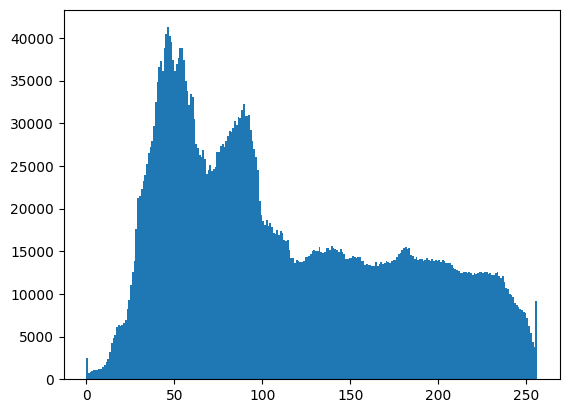

In [7]:
img = io.imread("https://images.unsplash.com/photo-1651666445280-426bae060557?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=987&q=80") 

plt.hist(img.ravel(),bins = 256, range = [0,256]) 
plt.show()

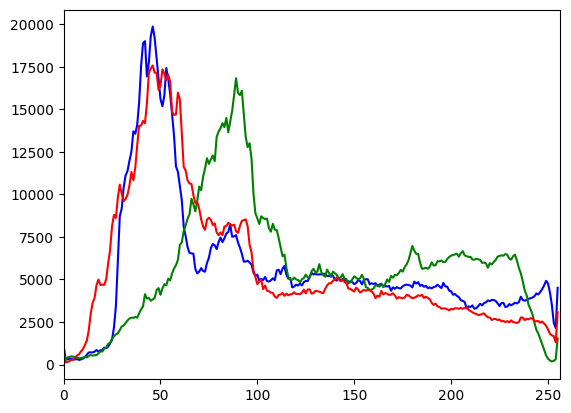

In [8]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

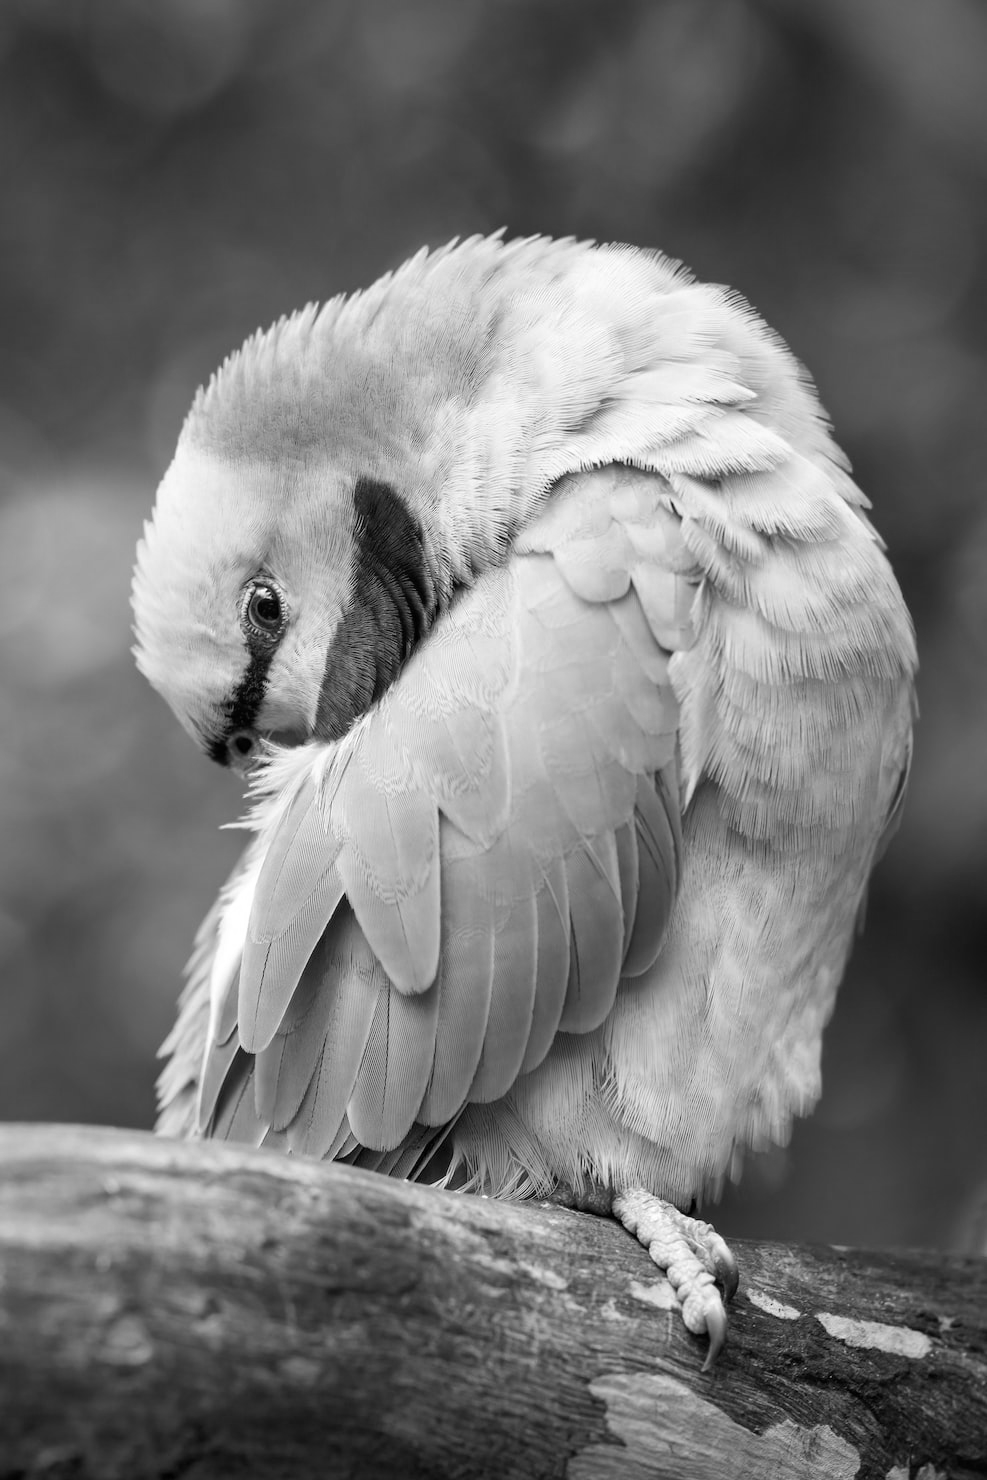

In [9]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

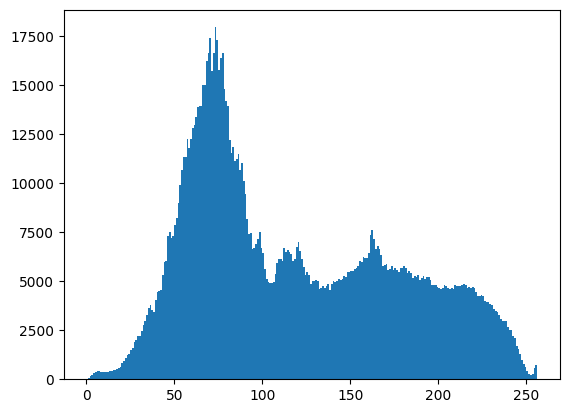

In [10]:
plt.hist(gray_img.ravel(),bins = 256, range = [0, 256])
plt.show()

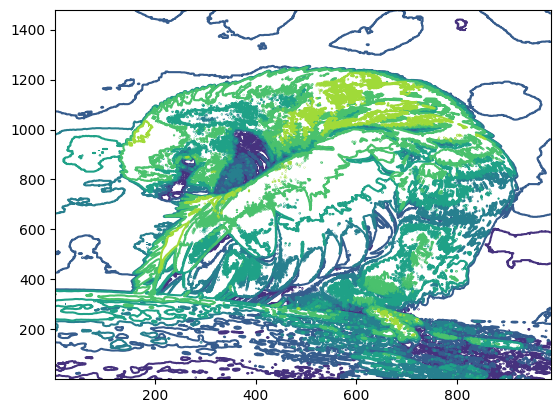

In [11]:
plt.contour(gray_img, origin = "image")
# contour: https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html

In [12]:
gray_img

array([[68, 68, 68, ..., 74, 74, 74],
       [68, 68, 67, ..., 74, 74, 74],
       [67, 67, 67, ..., 74, 74, 74],
       ...,
       [19, 19, 20, ..., 22, 22, 21],
       [16, 16, 16, ..., 26, 25, 25],
       [14, 14, 14, ..., 28, 28, 27]], dtype=uint8)

In [13]:
img2 = 255 - gray_img
img3 = 255.0*(gray_img/255.0)**2
img4 = (100.0/255)*gray_img + 100
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
import numpy as np

# We are going to flatten the transformed gray images so that all intensities can be equally common as possible.
def histeq(im, nbr_bins = 256):
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

In [15]:
example = histeq(img)
cv2_imshow(example)

Output hidden; open in https://colab.research.google.com to view.